In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS

In [71]:
df_movies = pd.read_parquet('data/df_movies_parquet.parquet',engine='pyarrow')
df_crew = pd.read_parquet('data/df_crew_parquet.parquet',engine='pyarrow')
df_cast = pd.read_parquet('data/df_cast_parquet.parquet',engine='pyarrow')


In [72]:
df_movies = df_movies[:6000]
df_movies.head(10)

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return
0,30000000.0,"[[16, ""Animation""], [35, ""Comedy""], [10751, ""F...",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995.0,12.451801
1,65000000.0,"[[12, ""Adventure""], [14, ""Fantasy""], [10751, ""...",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995.0,4.043035
2,0.0,"[[10749, ""Romance""], [35, ""Comedy""]]",15602.0,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995.0,0.000000
3,16000000.0,"[[35, ""Comedy""], [18, ""Drama""], [10749, ""Roman...",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995.0,5.090760
4,0.0,"[[35, ""Comedy""]]",11862.0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995.0,0.000000
5,60000000.0,"[[28, ""Action""], [80, ""Crime""], [18, ""Drama""],...",949.0,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,1995.0,3.123947
6,58000000.0,"[[35, ""Comedy""], [10749, ""Romance""]]",11860.0,en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,Released,Sabrina,6.2,141.0,1995.0,0.000000
7,0.0,"[[28, ""Action""], [12, ""Adventure""], [18, ""Dram...",45325.0,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,1995-12-22,0.0,97.0,Released,Tom and Huck,5.4,45.0,1995.0,0.000000
8,35000000.0,"[[28, ""Action""], [12, ""Adventure""], [53, ""Thri...",9091.0,en,International action superstar Jean Claude Van...,5.231580,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,1995.0,1.838576
9,58000000.0,"[[12, ""Adventure""], [28, ""Action""], [53, ""Thri...",710.0,en,James Bond must unmask the mysterious head of ...,14.686036,1995-11-16,352194034.0,130.0,Released,GoldenEye,6.6,1194.0,1995.0,6.072311


In [73]:
df_movies.dropna(axis=0,inplace=True)

In [74]:
df_movies['genres'].sample(2)

4118    [[18, "Drama"], [10769, "Foreign"], [36, "Hist...
514     [[28, "Action"], [12, "Adventure"], [80, "Crim...
Name: genres, dtype: object

In [75]:
df_cast.sample(2)

,id_credit,cast_id,character,gender,id,name,order
426244,57709,41,English General,0,78427,David Troughton,23
206138,39368,4,Eva,1,129928,Sarah Butler,2


## EDA: Analisis Exploratorio de datos

Respecto al analisis sobre el dataframe movies, son centraremos de manera mas profunda en las columnas: genres, budget, popularity, revenue, runtime, title, vote_count y return. Ademas de realizar un analisis temporal

Respecto al dataframe de crew, se analizaran las variables "job" y "department"

Respecto al dataframe de cast, se analizara la variable "genero"

#### 1.1 Pairplot y heatmap: correlacion entre variables de peliculas

In [76]:
df_numeric = df_movies.select_dtypes(include=[np.number])
df_numeric.drop(columns=['id'],inplace=True)


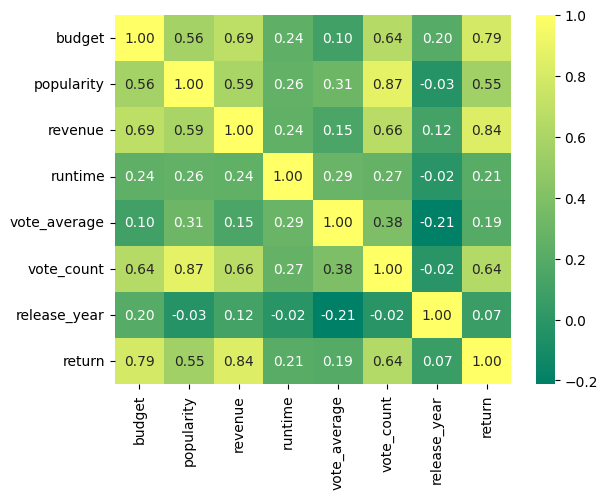

In [77]:
sns.heatmap(df_numeric.corr(method='spearman'),annot=True,fmt='.2f',cmap='summer')
plt.show()

Aclarar que correlacion no implica causalidad y considerar tambien que algunas variables no numericas podrian afectar tambien a la aplicacion de un modelo.

Para una futura aplicacion de un modelo que intente predecir los valores del presupuesto de la pelicula, en caso de desear saber si vale la pena o no hacer la pelicula, podrian considerarse usar columnas como revenue y popularity.

#### 1.2: Boxplots y outliers

In [78]:
def grafico_de_caja(df,column, title=''):
    # Funcion para graficar todos los graficos de caja de cada una de las variables del dataframe.
    n_rows = len(column)
    fig, axes = plt.subplots(nrows=n_rows, figsize=(15, 20))
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.5)
    for i in range(n_rows):
        ax = axes[i]
        sns.boxplot(data=df[column[i]], ax=ax, orient='h')
        ax.set_title(f'{column[i]} {title}', loc="right")
    return plt.show()

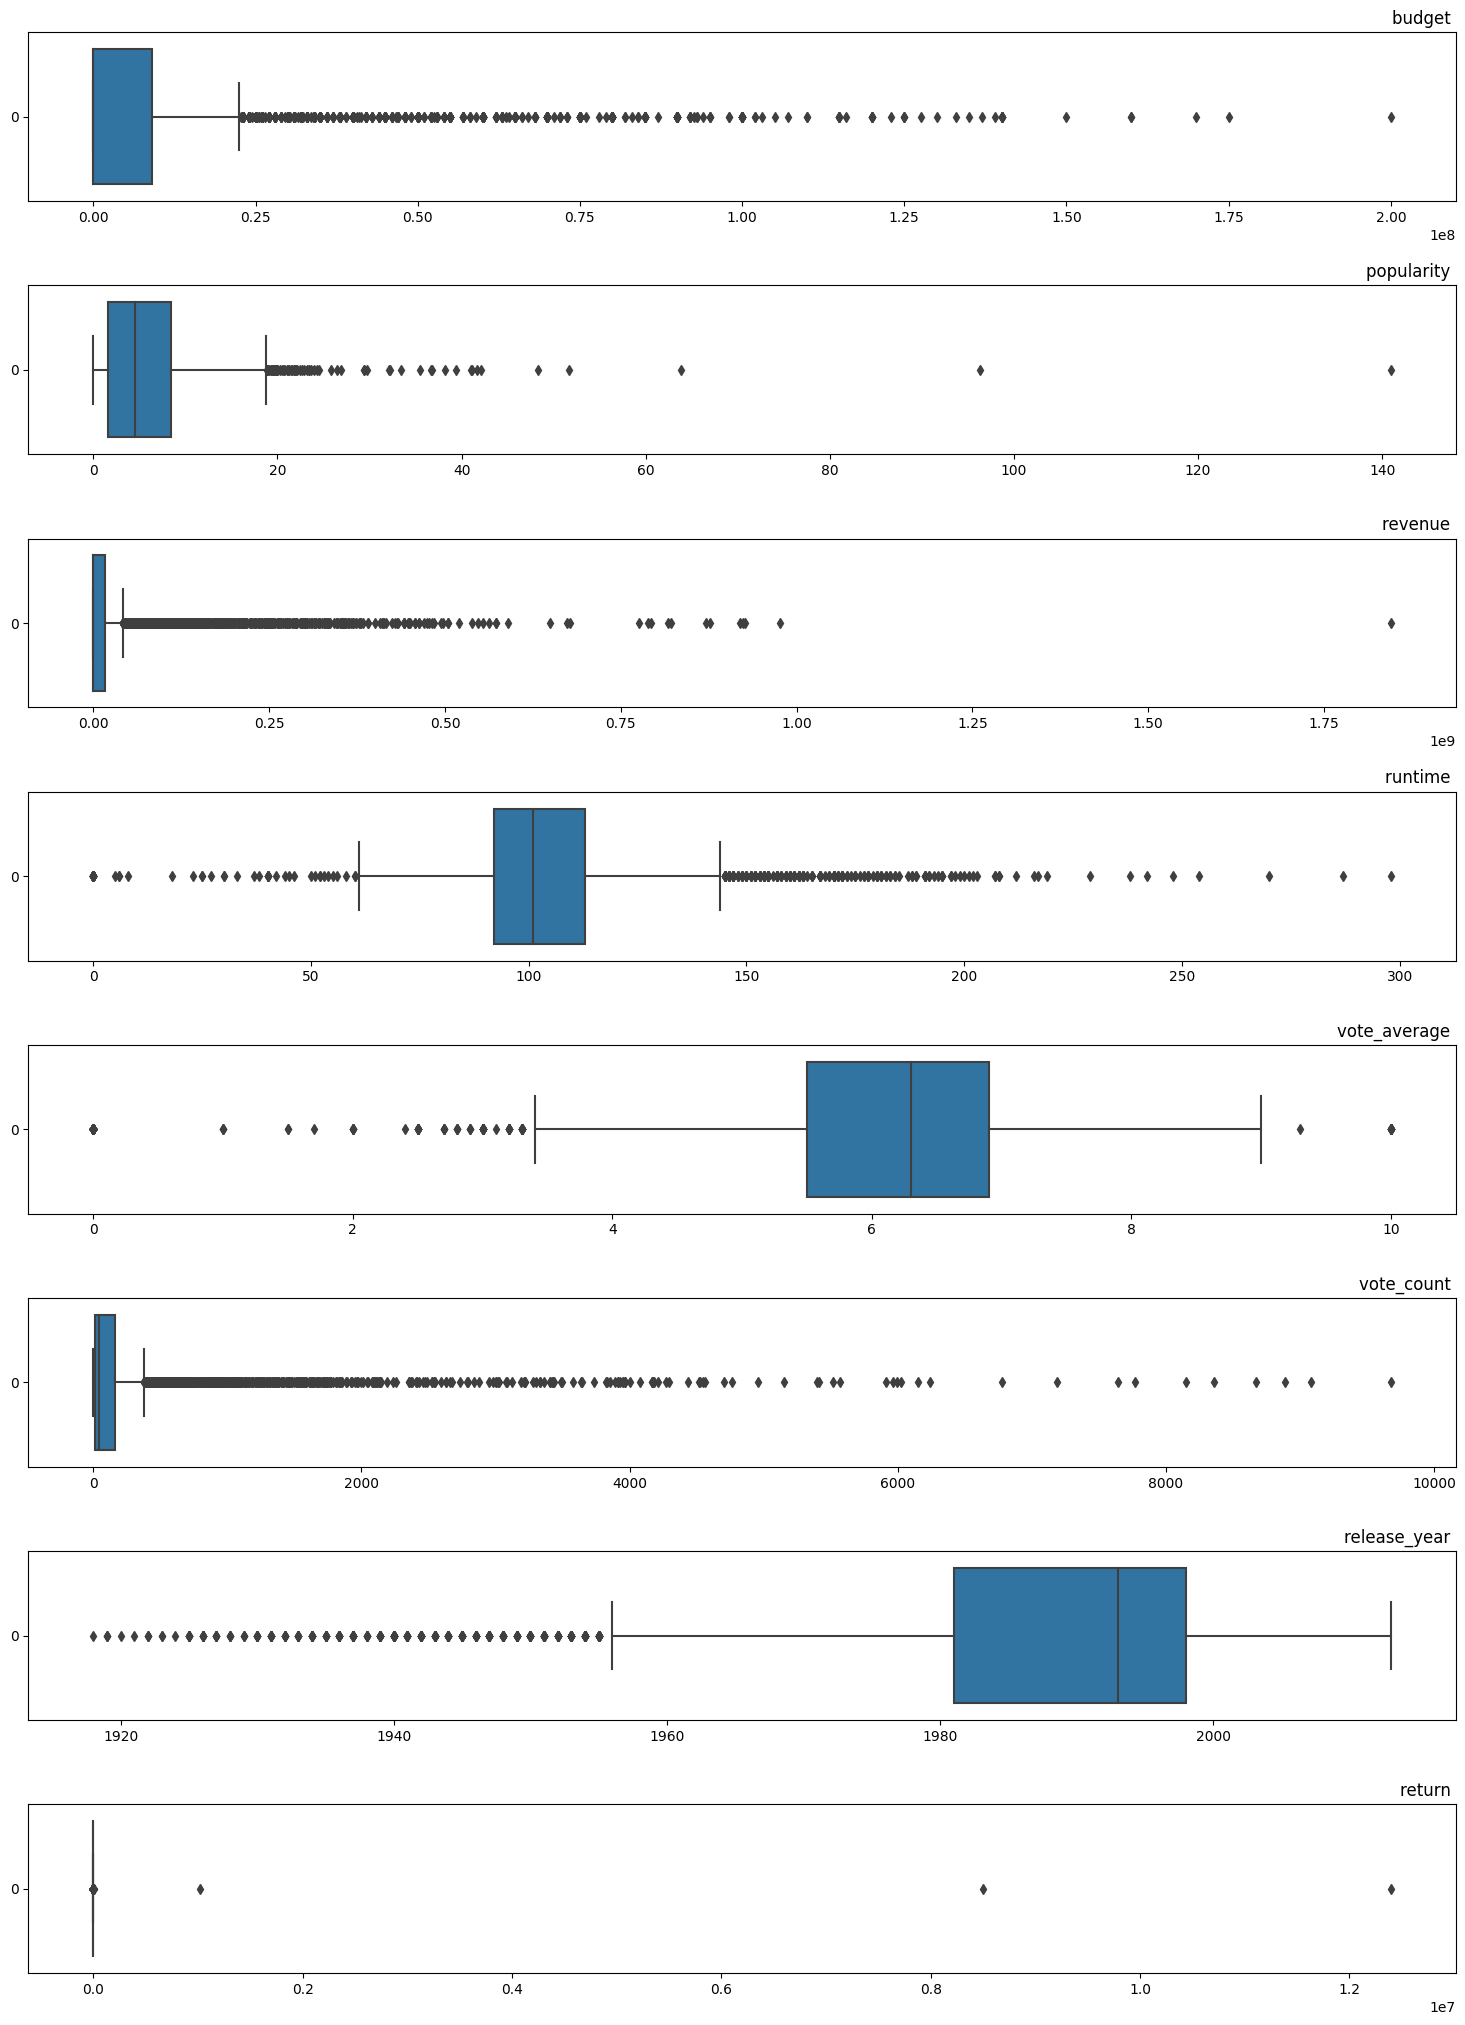

In [79]:
box = grafico_de_caja(df_numeric,column=df_numeric.columns)

Algunas columnas presentan valores atipicos en los datos por lo que deberian analizarse particularmente para observar si son valores correctos o no lo son.

Valores por ejemplo de "runtime" que son outliers, podrian llegar a ser documentales de larga duracion por lo que su valor seria correcto.

#### 1.3 Histogramas y distribucion

In [80]:
def graficar_histogramas(df, columnas):
  # Funcion para graficar todos los histogramas de cada una de las variables con los valores de asimetria y curtosis
  fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 4*len(columnas)))
  for i, columna in enumerate(columnas):
    # Graficar histograma
    sns.histplot(data=df, x=columna, ax=axes[i],bins=50)
    plt.xlim(auto=True)
    plt.ylim(auto=True)
  plt.tight_layout()
  return fig

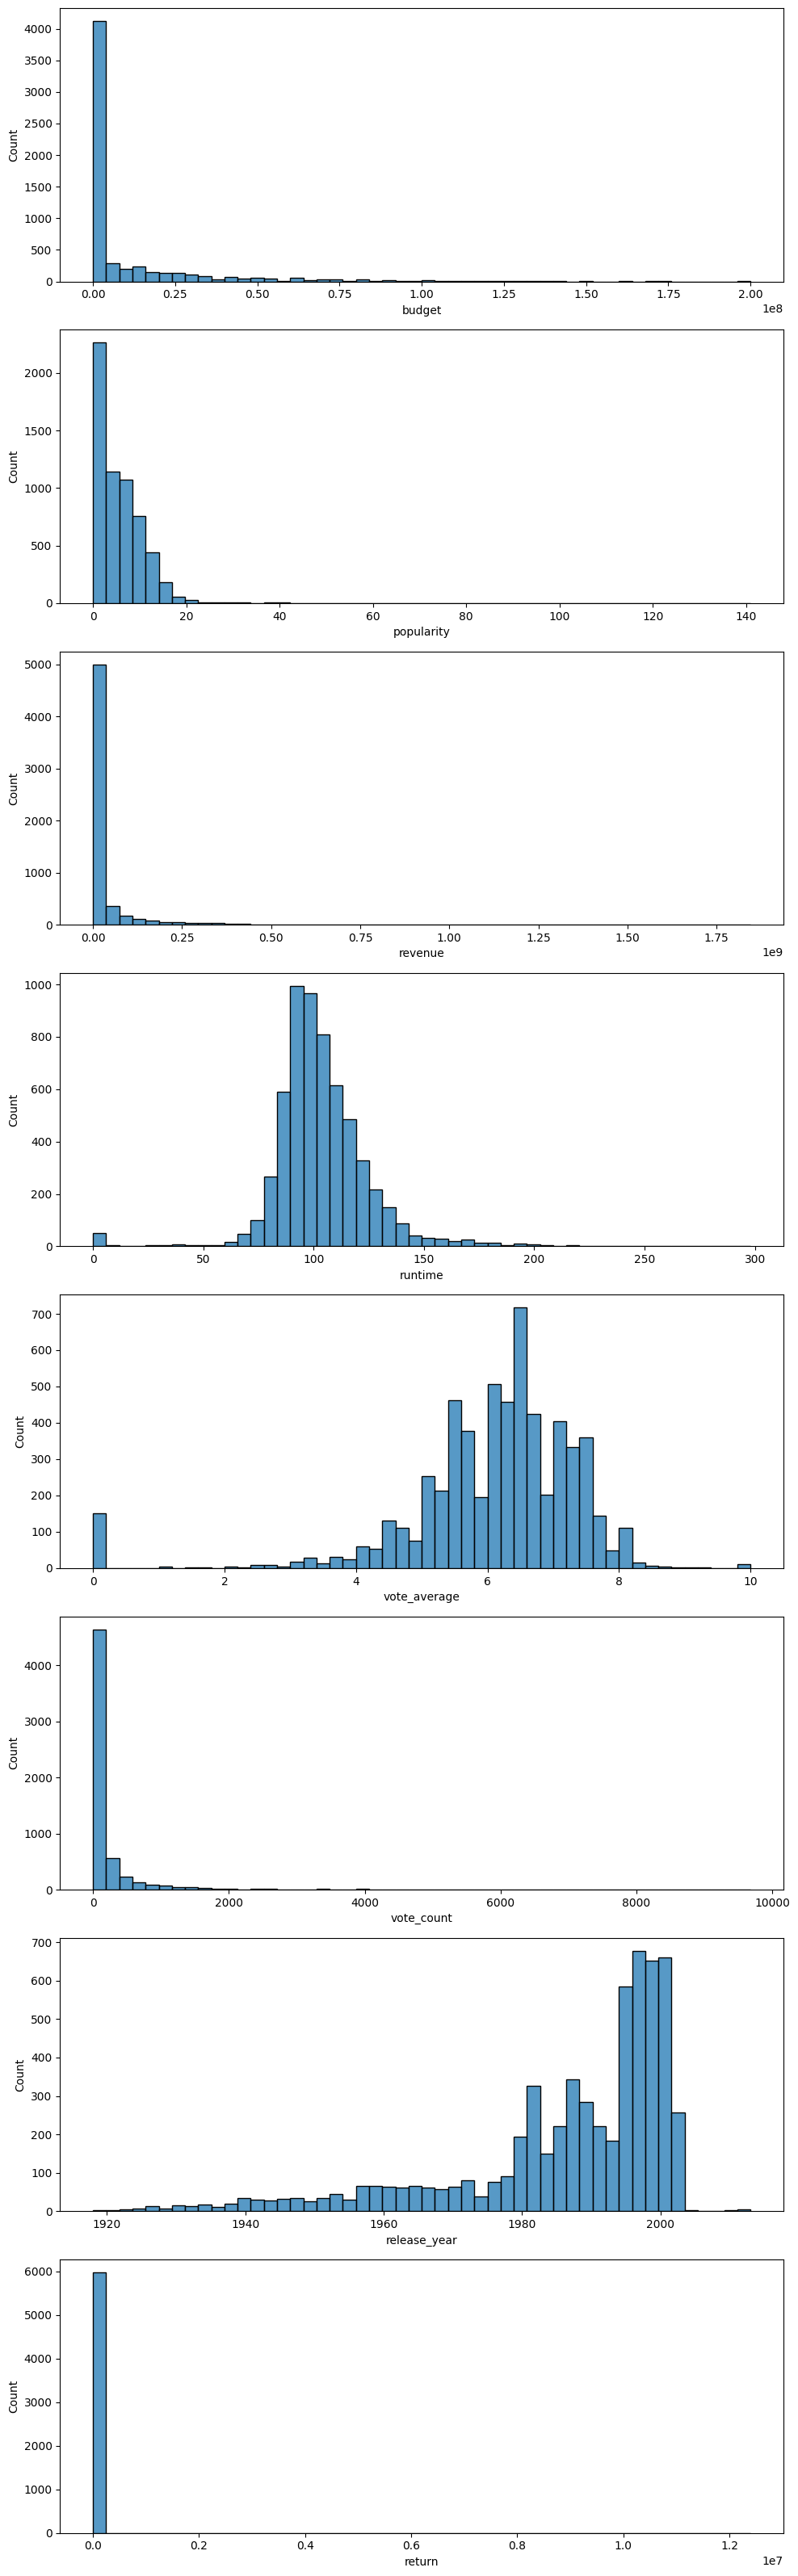

In [81]:
hist = graficar_histogramas(df_numeric,df_numeric.columns)

#### 2.0 Analisis categorico

En esta seccion se analizaran las variables categoricas tanto del dataframe de peliculas como de credits



#### 2.1: departamentos de crew

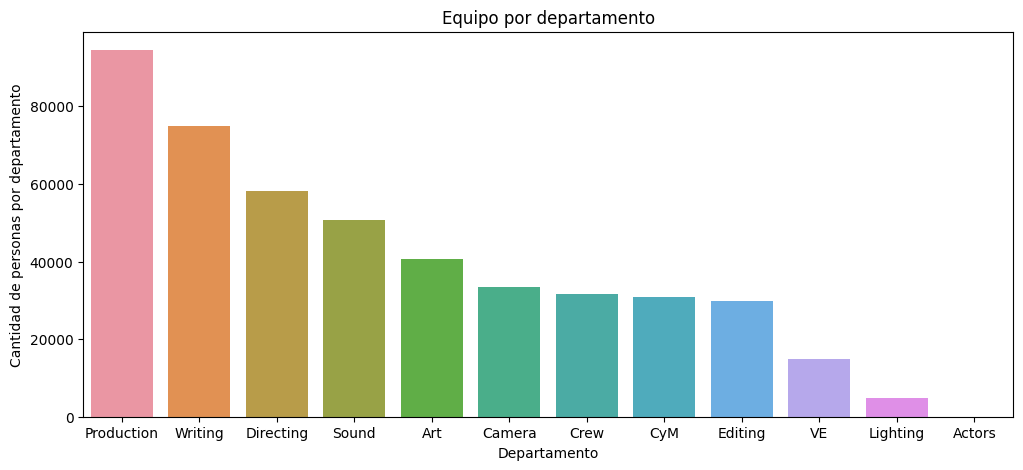

In [82]:
#preparamos los nombres de las columnas para que puedan ser graficadas
filas_a_renombrar = df_crew["department"].str.contains("Costume & Make-Up")
filas_a_renombrar_ve = df_crew["department"].str.contains("Visual Effects")
diccionario_remplazo = {"Costume & Make-Up": "CyM"}
diccionario_remplazo_ve = {"Visual Effects": "VE"}
df_crew["department"].replace(diccionario_remplazo, inplace=True, regex=True)
df_crew["department"].replace(diccionario_remplazo_ve, inplace=True, regex=True)
top_categories = df_crew['department'].value_counts().nlargest(12).index
plt.figure(figsize=(12,5))
sns.countplot(data=df_crew,x='department',order=top_categories)
plt.title('Equipo por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de personas por departamento')
plt.show()

Podemos observar que las categorias mas frecuentes son directing, writing, production y sound

#### 2.2 Jobs de crew (top10)
Debido a la cantidad tan variada que existe dentro de "job" del equipo, se analizara solamente los 10 trabajos que tengan mayor cantidad de personas.

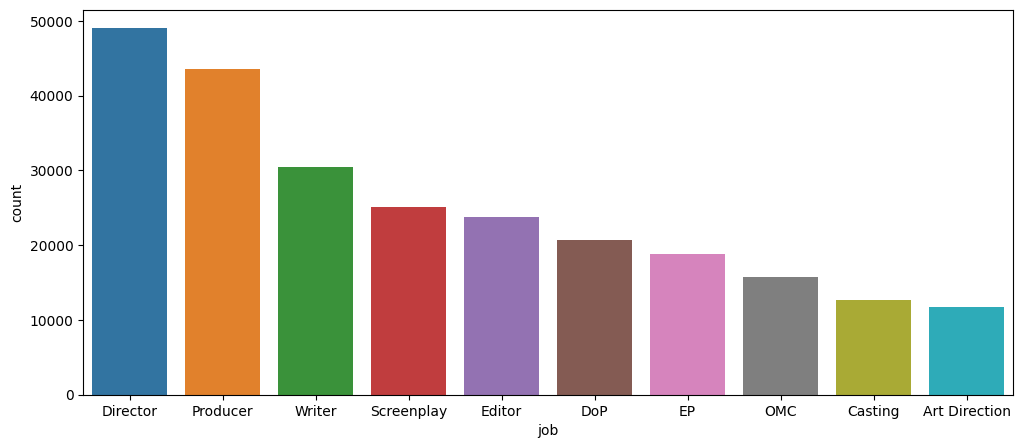

In [83]:
filas_a_renombrar = df_crew["job"].str.contains("Director of Photography")
filas_a_renombrar_2 = df_crew["job"].str.contains("Executive Producer")
filas_a_renombrar_3 = df_crew["job"].str.contains("Original Music Composer")
diccionario_remplazo = {"Director of Photography": "DoP"}
diccionario_remplazo_2 = {"Executive Producer": "EP"}
diccionario_remplazo_3 = {"Original Music Composer": "OMC"}
df_crew["job"].replace(diccionario_remplazo, inplace=True, regex=True)
df_crew["job"].replace(diccionario_remplazo_2, inplace=True, regex=True)
df_crew["job"].replace(diccionario_remplazo_3, inplace=True, regex=True)
top_categories = df_crew['job'].value_counts().nlargest(10).index
plt.figure(figsize=(12,5))
sns.countplot(data=df_crew,x='job',order=top_categories)
plt.show()

#### 2.3 top 7 Actores (frecuencia) de cast

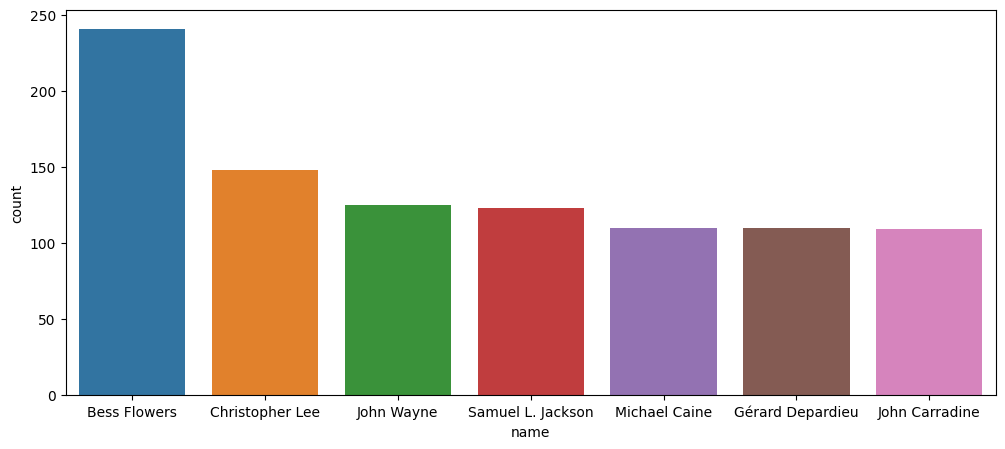

In [84]:
top_categories = df_cast['name'].value_counts().nlargest(7).index
plt.figure(figsize=(12,5))
sns.countplot(data=df_cast,x='name',order=top_categories)
plt.show()

#### 2.4 Distribucion de generos del casting

<AxesSubplot: ylabel='count'>

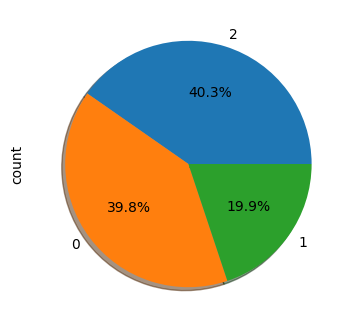

In [85]:
plt.figure(figsize=(6,4))
df_cast['gender'].value_counts().plot.pie(autopct='%0.1f%%',shadow=True)

transformar los datos de genres de str json a una lista de python

In [86]:
df_movies['genres'] = df_movies['genres'].apply(json.loads)
def juntar_listas(lista):
  if isinstance(lista, (list)):
    return ','.join([str(elemento[1]) for elemento in lista])
df_movies['generos'] = df_movies['genres'].apply(juntar_listas)
df_movies['generos'] = df_movies['generos'].apply(lambda x: x.split(','))

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
generos_dummies = mlb.fit_transform(df_movies["generos"])
generos_df = pd.DataFrame(generos_dummies, columns=mlb.classes_)
df_movies = pd.concat([df_movies, generos_df], axis=1)

#### 2.5 Distribucion del genero de las peliculas

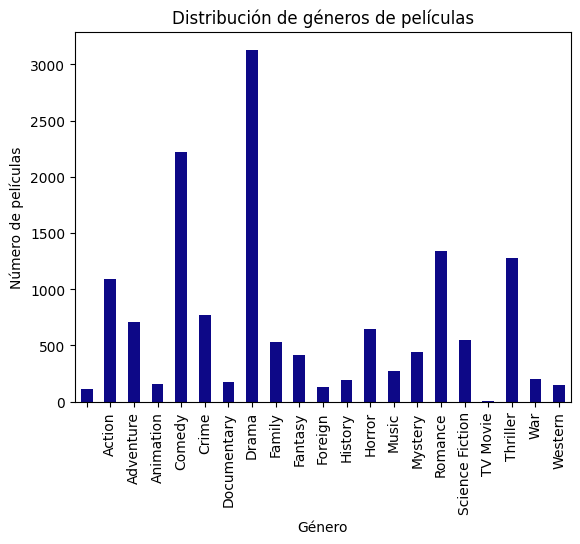

In [87]:
# Graficar la distribución de géneros
generos_df.sum().plot(kind="bar",colormap='plasma')
plt.xlabel("Género")
plt.ylabel("Número de películas")
plt.title("Distribución de géneros de películas")
plt.show()

#### 3.0 Analisis de la popularidad de las peliculas en base al tiempo

In [88]:
from datetime import datetime
df_movies.dropna(subset=['release_date'],inplace=True)
#la columna 'weekend' que indica si el dia es un dia de la semana (weekday = 1) o si es fin de semana(weekday= 0 =weekend)
#la columna 'weekday' que indica el numero de la semana. 0 = Lunes, 1 = Martes, 6 = Domingo
df_movies['weekend'] = df_movies['release_date'].apply(lambda x: x.weekday() < 5).astype(int)
df_movies['weekday'] = df_movies['release_date'].apply(lambda x: x.weekday())
# Creamos las columnas de trimestre, mes y decada
df_movies['quarter'] = df_movies['release_date'].apply(lambda x: x.quarter)
df_movies['month'] = df_movies['release_date'].apply(lambda x: x.month)
df_movies['decada'] = (df_movies['release_year'] // 10) * 10

In [89]:
def variable_tiempo(df,variable,columnas_tiempo):
    # funcion creada para ver la acumulacion de valores en diferentes marcos temporales de una variable.
    #columnas_tiempo = ['year','quarter','month','weekday','hour','weekend']
    plt.figure(figsize=(18, 14))
    y = 3
    x = 2
    z = 1
    for col in columnas_tiempo:
        plt.subplot(x,y,z,facecolor = 'skyblue')
        z += 1
        df.groupby(col)[variable].sum().plot(kind='bar',color='green')
        plt.title(f'{variable} vs {col}')
        plt.xlabel(col)
        plt.ylabel("kW")



#### 3.1 Marcos temporales de popularidad

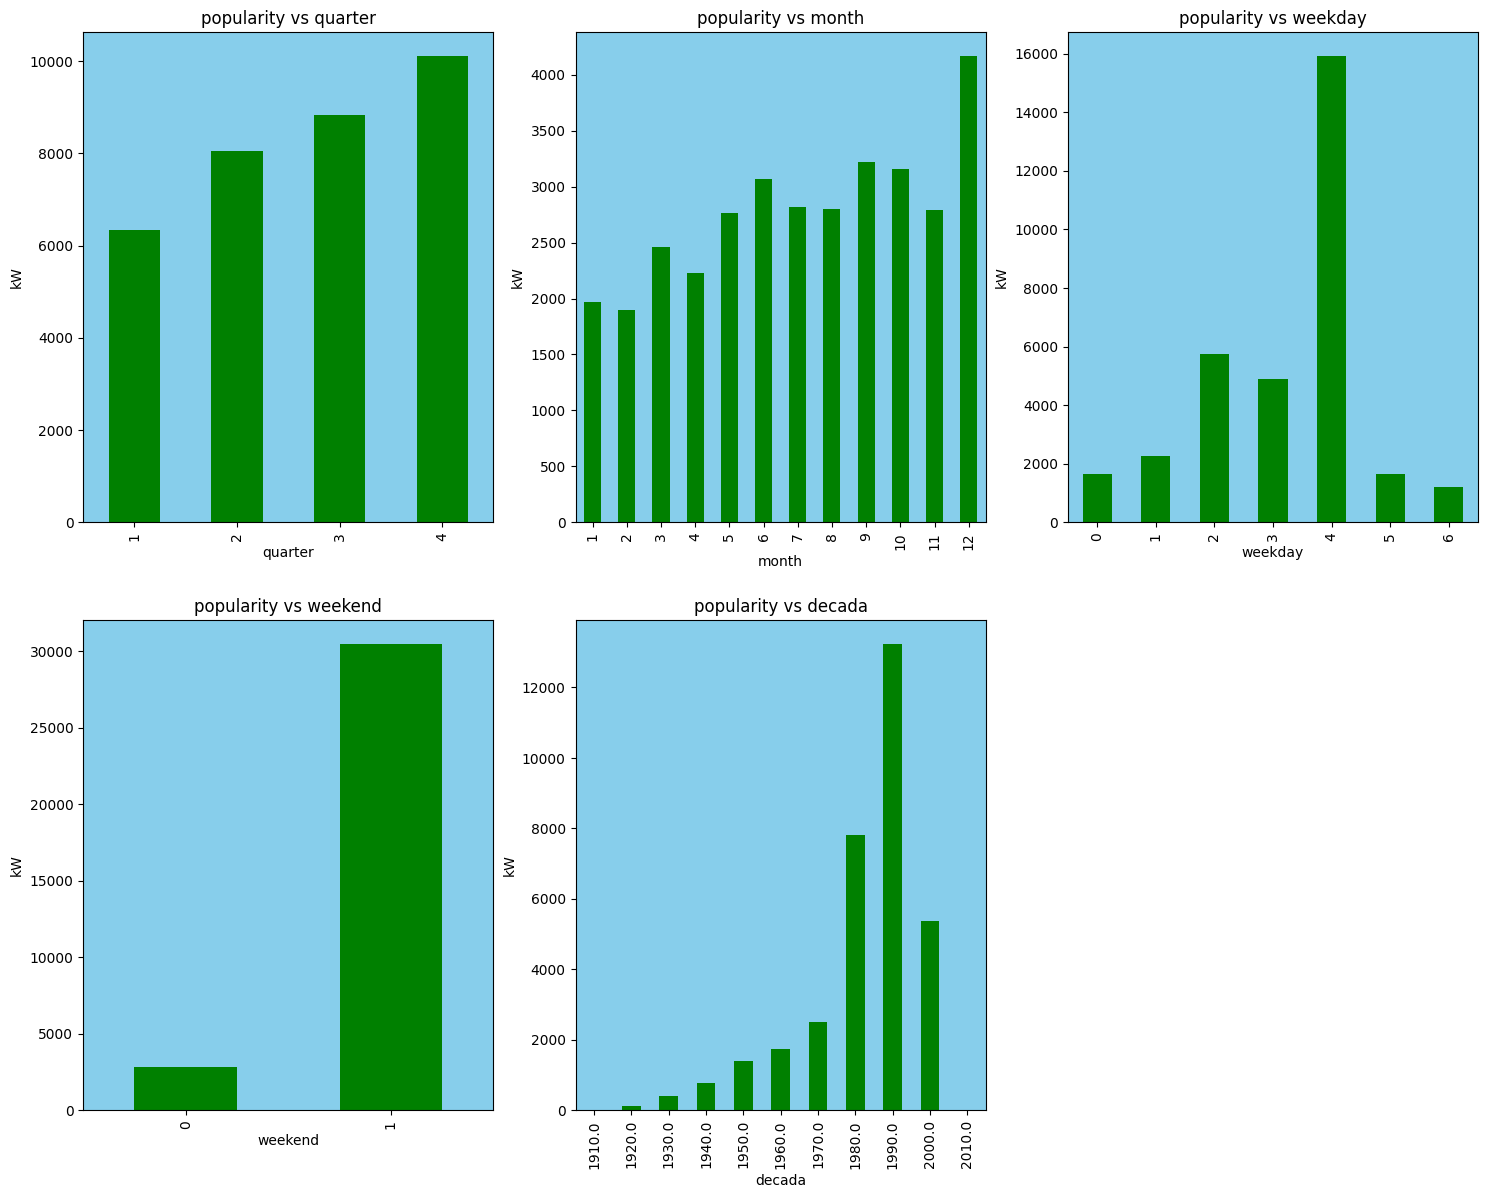

In [90]:
variable_objetivo = 'popularity'
cols = ['quarter','month','weekday','weekend','decada']
marco_temporal = variable_tiempo(df_movies,variable_objetivo,columnas_tiempo=cols)

Se puede observar que el cuarto trimestre o cuarto cuarto valga la redundancia, corresponde al cuarto mayor popularidad, si nos situamos en que se estrenan en USA, el cuarto trimestre en los Estados Unidos comienza el 1 de octubre y termina el 31 de diciembre siendo estas las fechas de mayor popularidad.
El mes septiembre corresponde al mes con mayor popularidad. El dia viernes tambien corresponde al dia de la semana donde se estrenaron mas peliculas.

Respecto a la decada, podemos observar que existe una tendencia al alza a medida que avanza el tiempo, y tambien se podria intentar conseguir datos acerca de la decada siguiente para evaluar si sigue existiendo esta tendencia, o compararse con el estreno de series y ver si esta misma no esta afectando a la tendencia.

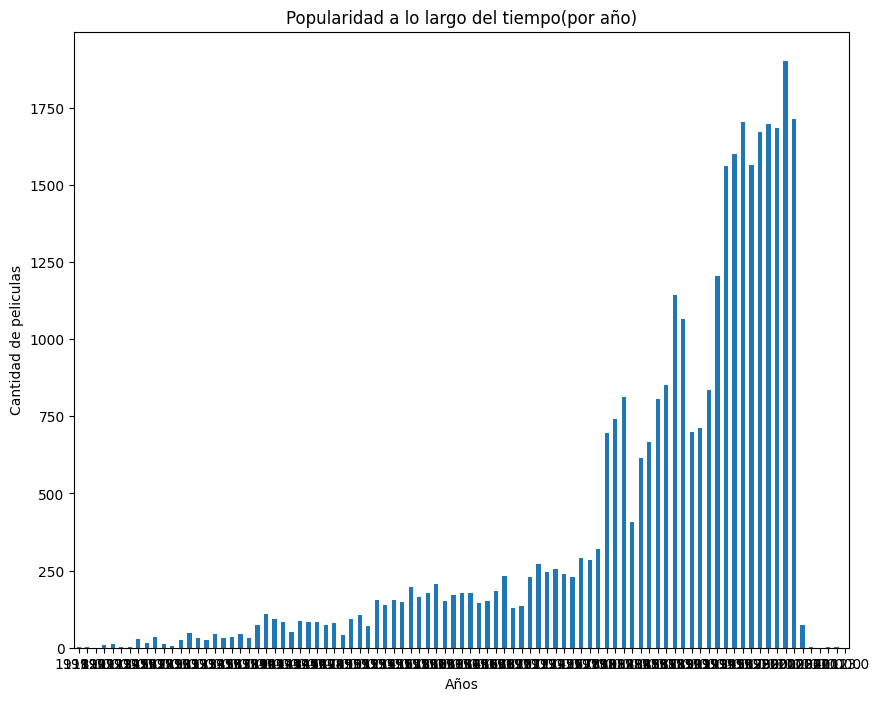

In [91]:
plt.figure(figsize=(10,8))
ax = plt.gca()
plt.gca().set_xticks([])
df_movies.groupby('release_year')['popularity'].sum().plot(kind='bar')
plt.title('Popularidad a lo largo del tiempo(por año)')
plt.xlabel("Años")
plt.ylabel("Cantidad de peliculas")
plt.show()

### 4.0 Nube de palabras de peliculas

In [92]:
from Funciones import preprocesamiento # importamos preprocesamiento para lematizar la data
df_movies['overview_tokenizado'] = df_movies['overview'].apply(preprocesamiento)

In [93]:
wc = WordCloud(background_color='white', width=800, height=600).generate(' '.join(x for x in df_movies['overview_tokenizado']))

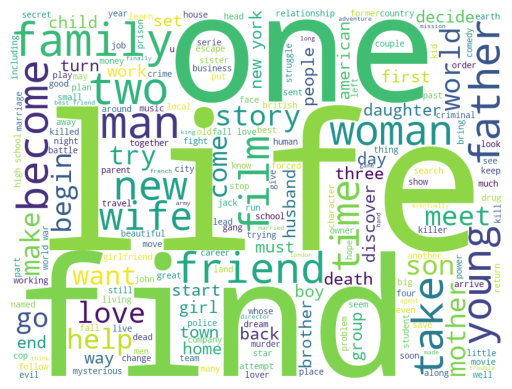

In [94]:
plt.imshow(wc)
plt.axis('off')
plt.show()